In [125]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("data/titanic.csv")

In [20]:
df.shape

(1310, 14)

In [23]:
df = df.dropna(how="all")

In [24]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [65]:
titles = df["name"].apply(lambda x: re.findall(r",[^\.]*\.",x)[0][2:-1]).unique()

In [93]:
for title in titles:
    median_age = df[df["name"].str.contains(title)]["age"].median()
    ind = df[df["name"].str.contains(title)][df["age"].isna()].index
    df["age"].loc[ind] = df.loc[df["name"].str.contains(title)]["age"].fillna(median_age)

<ipython-input-93-e3d50d6af7dc>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind = df[df["name"].str.contains(title)][df["age"].isna()].index
<ipython-input-93-e3d50d6af7dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].loc[ind] = df.loc[df["name"].str.contains(title)]["age"].fillna(median_age)


In [94]:
df.age.isna().sum()

0

In [101]:
df.fare.fillna(df.fare.mean(),inplace=True)

/home/felipe/miniconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [102]:
data = df.drop(columns=["name","ticket","cabin","body","home.dest", "boat"])

In [103]:
data = pd.get_dummies(data)
data.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1,0,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0,1,0,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1,0,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,0,1,0,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1,0,0,0,1


In [104]:
data.isna().sum()

pclass        0
survived      0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64

In [105]:
data.shape

(1309, 11)

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["survived"]), data["survived"])

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
tree = DecisionTreeClassifier(max_depth=3)

In [163]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [164]:
from sklearn.tree import plot_tree

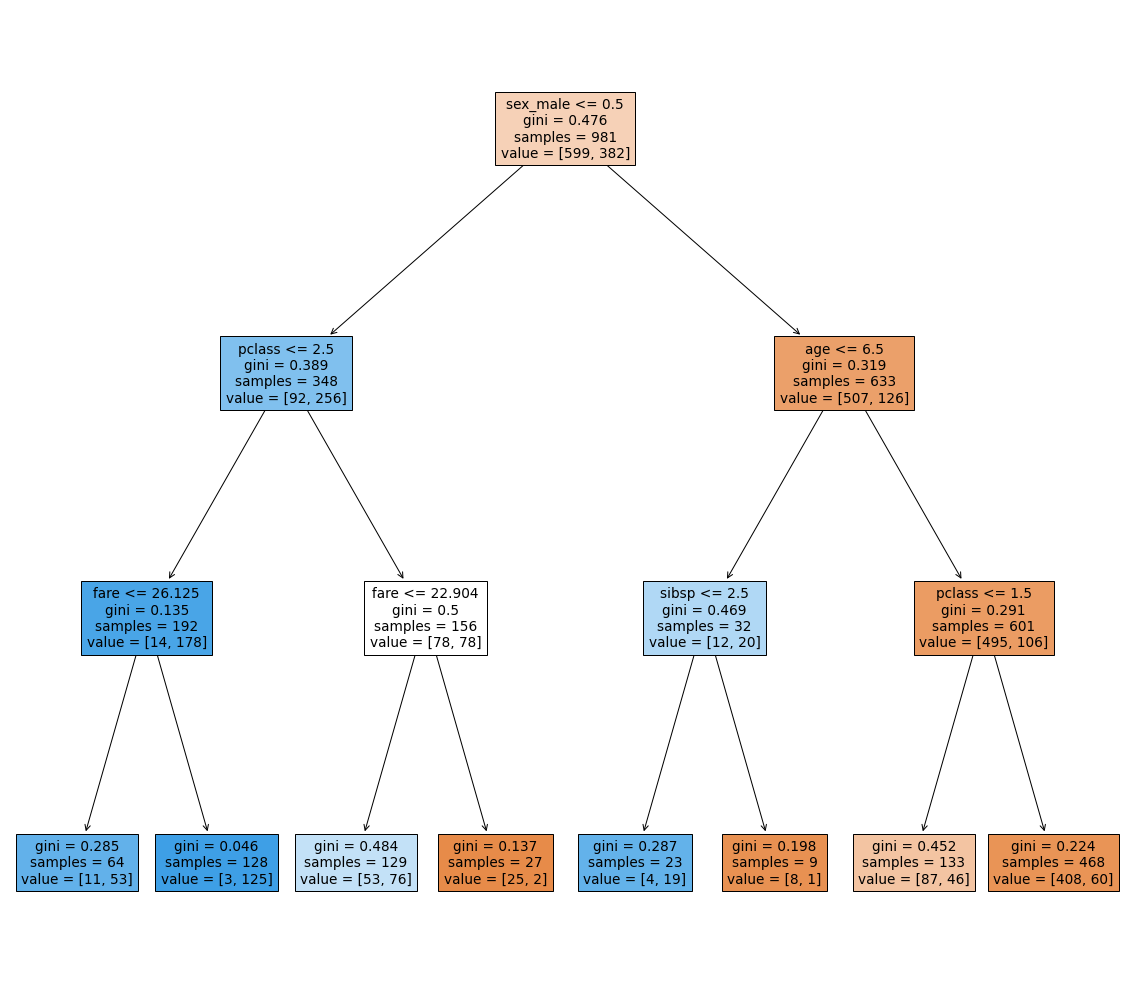

In [165]:
plt.figure(figsize=(20,18))
plot_tree(tree, feature_names=X_train.columns, filled=True);

In [184]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [167]:
y_pred = tree.predict(X_test)

In [168]:
accuracy_score(y_test,y_pred)

0.7926829268292683

In [169]:
f1_score(y_test,y_pred)

0.706896551724138

In [181]:
train = {}
test = {}
for depth in range(1,50):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    train[depth] = f1_score(y_train,tree.predict(X_train))
    test[depth] = f1_score(y_test,tree.predict(X_test))
    

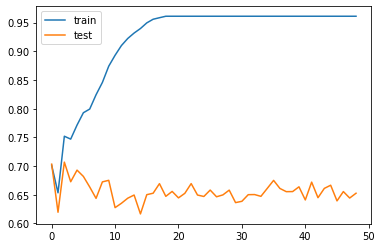

In [182]:
plt.plot(train.values(),label="train")
plt.plot(test.values(),label="test")
plt.legend();

In [185]:
confusion_matrix(y_test,y_pred)

array([[178,  32],
       [ 36,  82]])

In [188]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [189]:
params = {'min_samples_leaf':np.arange(20,50,5),
          'min_samples_split':np.arange(20,50,5),
          'max_depth':np.arange(3,6),
          'min_weight_fraction_leaf':np.arange(0,0.4,0.1)}

In [192]:
grid = GridSearchCV(
     estimator=DecisionTreeClassifier(),
     param_grid=params,
     verbose=3,
     scoring="f1",
     return_train_score=True
)

In [193]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.759, test=0.694), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.725, test=0.714), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.743, test=0.738), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.753, test=0.703), total=   0.0s
[CV] max_depth=3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.753, test=0.703), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.719, test=0.691), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=40, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=40, mi

[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=40, mi

[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 


[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40

[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20

[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fra

[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=40, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=20, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.725, test=0.667), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.718, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.742, test=0.667), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.702, test=0.656), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.713, test=0.702), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.721, test=0.672), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.742, test=0.667), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0 


[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=35

[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, mi

[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.688, test=0.678), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.715, test=0.652), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.691, test=0.667), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fractio

[CV] max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction

[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=25, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=35, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_l

[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.737, test=0.727), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.746, test=0.677), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.736, test=0.721), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.745, test=0.707), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.719, test=0.702), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.737, test=0.727), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=35, mi

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.737, test=0.727), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.746, test=0.677), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.736, test=0.721), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=45, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, mi

[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=35, mi

[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=45, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.609, test=0.661), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=25, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.715, test=0.652), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.691, test=0.667), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.629, test=0.584), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.728, test=0.681), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.702, test=0.656), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.688, test=0.678), total=   0.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, mi

[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.700, test=0.681), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.702, test=0.656), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_l

[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.701, test=0.704), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=30

[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.0s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_l

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   54.6s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_leaf': array([20, 25, 30, 35, 40, 45]),
                         'min_samples_split': array([20, 25, 30, 35, 40, 45]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3])},
             return_train_score=True, scoring='f1', verbose=3)

In [197]:
pd.DataFrame(grid.cv_results_)["mean_test_score"].sort_values()

133    0.661824
373    0.661824
177    0.661824
89     0.661824
321    0.661824
         ...   
292    0.709663
296    0.709663
304    0.709663
308    0.709663
300    0.709663
Name: mean_test_score, Length: 432, dtype: float64

In [202]:
pd.DataFrame(grid.best_estimator_.feature_importances_,index=X_train.columns).T

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.197738,0.097744,0.005515,0.0,0.078578,0.620424,0.0,0.0,0.0,0.0


In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
grid = GridSearchCV(
     estimator=RandomForestClassifier(),
     param_grid=params,
     verbose=3,
     scoring="f1",
     return_train_score=True
)

In [205]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.715, test=0.690), total=   0.5s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.702, test=0.704), total=   0.4s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.714, test=0.676), total=   0.4s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.696, test=0.735), total=   0.4s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.716, test=0.694), total=   0.3s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.0 


[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.5s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.5s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.5s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_l

[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=20, min_samples_split=45, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.705, test=0.690), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.709, test=0.685), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.696, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.709, test=0.701), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.711, test=0.671), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.713, test=0.680), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.0 


[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.709, test=0.671), total=   0.4s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.698, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_l

[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=20, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.714, test=0.700), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.718, test=0.667), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.693, test=0.738), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.0 


[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_l

[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=25, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.693, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=35, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.711, test=0.671), total=   0.3s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.0 


[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_l

[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.693, test=0.738), total=   0.4s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=30, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.713, test=0.685), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.730), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=40, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.707, test=0.700), total=   0.4s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.679, test=0.731), total=   0.3s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.694), total=   0.3s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.0 


[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=3, min_samples_l

[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.708, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=35, min_weight_fractio

[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.696, test=0.738), total=   0.4s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.694), total=   0.4s
[CV] max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=3, min_samples_leaf=45, min_samples_split=45, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.701, test=0.730), total=   0.5s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.720, test=0.704), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.0 


[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.5s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_l

[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.5s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.5s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=40, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.714, test=0.706), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.719, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.708, test=0.755), total=   0.4s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=20, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.712, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.716, test=0.699), total=   0.5s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.0 


[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.703), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_l

[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=25, min_samples_split=45, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.708, test=0.690), total=   0.3s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.707, test=0.689), total=   0.4s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.696, test=0.743), total=   0.4s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=25, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.707, test=0.689), total=   0.3s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.0 


[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=4, min_samples_leaf=30, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_l

[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=20, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.690), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.707, test=0.689), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.698, test=0.730), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=30, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.709, test=0.695), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.711, test=0.671), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.0 


[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.690, test=0.667), total=   0.3s
[CV] max_depth=4, min_samples_leaf=35, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_l

[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=25, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=35, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.0 


[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.5s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_l

[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.693, test=0.738), total=   0.3s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=30, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.707, test=0.685), total=   0.3s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=40, min_weight_fractio

[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.5s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.746, test=0.704), total=   0.4s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.0 


[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_l

[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.708, test=0.685), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=35, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.717, test=0.701), total=   0.5s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.735, test=0.681), total=   0.6s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.711, test=0.725), total=   0.4s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=20, min_samples_split=45, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.5s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.5s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=20, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.627, test=0.701), total=   0.4s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.715, test=0.709), total=   0.5s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, min_weight_fraction_leaf=0.0 


[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_l

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=40, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.716, test=0.695), total=   0.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.712, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.0, score=(train=0.698, test=0.743), total=   0.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=20, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=25, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.708), total=   0.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=30, min_weight_fraction_leaf=0.0 


[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_l

[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.708, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=45, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.709, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.707, test=0.685), total=   0.5s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.0, score=(train=0.697, test=0.730), total=   0.5s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=25, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.708, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=30, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.599, test=0.636), total=   0.3s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.707, test=0.689), total=   0.4s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=35, min_weight_fraction_leaf=0.0 


[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.5s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.707, test=0.699), total=   0.5s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_l

[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=20, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.0, score=(train=0.694, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=30, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.5s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=35, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=40, min_weight_fraction_leaf=0.0 


[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.690), total=   0.5s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.706, test=0.685), total=   0.5s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.2, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.687, test=0.672), total=   0.4s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=45, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_l

[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.706, test=0.685), total=   0.5s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.1, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fraction_leaf=0.2 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=25, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.0, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1, score=(train=0.704, test=0.689), total=   0.5s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fraction_leaf=0.1 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=35, min_weight_fractio

[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.704, test=0.690), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.706, test=0.685), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=40, min_weight_fraction_leaf=0.30000000000000004, score=(train=0.692, test=0.738), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0 
[CV]  max_depth=5, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0, score=(train=0.704, test=0.689), total=   0.4s
[CV] max_depth=5, min_samples_leaf=45, min_samples_split=45, min_weight_fraction_leaf=0.0 


[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 14.8min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_leaf': array([20, 25, 30, 35, 40, 45]),
                         'min_samples_split': array([20, 25, 30, 35, 40, 45]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3])},
             return_train_score=True, scoring='f1', verbose=3)

In [206]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_min_weight_fraction_leaf,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.392038,0.039145,0.026991,0.003447,3,20,20,0,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.689655,...,0.698878,0.020056,376,0.714536,0.701874,0.704082,0.714286,0.695804,0.706116,0.007295
1,0.348075,0.008439,0.023587,0.001334,3,20,20,0.1,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.689189,...,0.701275,0.019624,62,0.704467,0.700680,0.704082,0.705680,0.691910,0.701364,0.005010
2,0.389874,0.051885,0.033267,0.005188,3,20,20,0.2,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.689189,...,0.701275,0.019624,62,0.704467,0.700680,0.704082,0.705680,0.691910,0.701364,0.005010
3,0.379069,0.016984,0.027368,0.002825,3,20,20,0.3,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.689189,...,0.701482,0.019511,57,0.704467,0.700680,0.707143,0.705680,0.691910,0.701976,0.005470
4,0.429021,0.043268,0.031518,0.004700,3,20,25,0,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.684932,...,0.702493,0.022250,33,0.713043,0.709122,0.711340,0.720848,0.697917,0.710454,0.007409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.352604,0.018609,0.025703,0.004037,5,45,40,0.3,"{'max_depth': 5, 'min_samples_leaf': 45, 'min_...",0.689189,...,0.701275,0.019624,62,0.704467,0.700680,0.704082,0.705680,0.691910,0.701364,0.005010
428,0.317578,0.019642,0.025040,0.005899,5,45,45,0,"{'max_depth': 5, 'min_samples_leaf': 45, 'min_...",0.689189,...,0.699570,0.016451,361,0.704467,0.705479,0.704082,0.708117,0.696707,0.703771,0.003802
429,0.304560,0.030837,0.023178,0.005967,5,45,45,0.1,"{'max_depth': 5, 'min_samples_leaf': 45, 'min_...",0.689189,...,0.701275,0.019624,62,0.704467,0.700680,0.704082,0.705680,0.691910,0.701364,0.005010
430,0.412183,0.065594,0.028625,0.004055,5,45,45,0.2,"{'max_depth': 5, 'min_samples_leaf': 45, 'min_...",0.689189,...,0.701275,0.019624,62,0.704467,0.700680,0.704082,0.705680,0.691910,0.701364,0.005010


In [207]:
pd.DataFrame(grid.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_min_weight_fraction_leaf,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
168,0.299297,0.029013,0.021454,0.001697,4,25,20,0,"{'max_depth': 4, 'min_samples_leaf': 25, 'min_...",0.699301,...,0.711929,0.023693,1,0.713533,0.723327,0.713781,0.719298,0.707804,0.715549,0.005324
160,0.320890,0.012148,0.023441,0.002611,4,20,40,0,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.724638,...,0.710667,0.014236,2,0.728905,0.726592,0.724382,0.738182,0.715631,0.726738,0.007275
164,0.301429,0.008860,0.023018,0.002153,4,20,45,0,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.704225,...,0.708173,0.016158,3,0.723708,0.721805,0.716094,0.723636,0.710866,0.719222,0.005018
180,0.322834,0.018759,0.023294,0.002658,4,25,35,0,"{'max_depth': 4, 'min_samples_leaf': 25, 'min_...",0.699301,...,0.707977,0.020364,4,0.718310,0.730983,0.716263,0.717047,0.718693,0.720259,0.005432
336,0.266482,0.010472,0.020464,0.002652,5,30,20,0,"{'max_depth': 5, 'min_samples_leaf': 30, 'min_...",0.694444,...,0.706411,0.019696,5,0.716049,0.717584,0.716263,0.711806,0.698080,0.711957,0.007205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.330690,0.020639,0.025500,0.006134,5,45,30,0.3,"{'max_depth': 5, 'min_samples_leaf': 45, 'min_...",0.689189,...,0.683197,0.035846,428,0.704467,0.684783,0.704082,0.697248,0.691910,0.696498,0.007482
371,0.343148,0.015142,0.026829,0.004555,5,35,30,0.3,"{'max_depth': 5, 'min_samples_leaf': 35, 'min_...",0.689189,...,0.680756,0.023487,429,0.704467,0.700680,0.707692,0.705680,0.599174,0.683539,0.042244
315,0.411481,0.039040,0.031007,0.008157,5,25,20,0.3,"{'max_depth': 5, 'min_samples_leaf': 25, 'min_...",0.689189,...,0.677515,0.027791,430,0.704467,0.651252,0.704082,0.705680,0.627219,0.678540,0.032984
391,0.293628,0.012059,0.022184,0.001803,5,40,25,0.3,"{'max_depth': 5, 'min_samples_leaf': 40, 'min_...",0.689189,...,0.676131,0.055630,431,0.704467,0.692998,0.709565,0.660269,0.691910,0.691842,0.017156


In [209]:
y_pred = grid.best_estimator_.predict(X_test)

In [210]:
confusion_matrix(y_test, y_pred)

array([[179,  31],
       [ 39,  79]])

# Decision Tree Regressor

In [212]:
df = pd.read_csv("data/wine.csv")

In [213]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [214]:
X = df.drop(columns="quality")
y = df["quality"]

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [218]:
df.shape

(4898, 12)

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [221]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [223]:
y_pred = lr.predict(X_train)

In [227]:
mean_squared_error(y_train, y_pred)

0.5644999790897935

In [235]:
y_pred = lr.predict(X_test)
mean_squared_error(y_test,y_pred)

0.5606954907314443

In [236]:
tree = DecisionTreeRegressor()

In [237]:
tree.fit(X_train,y_train)
y_pred = tree.predict(X_train)
mean_squared_error(y_train, y_pred)

0.0

In [238]:
y_pred = tree.predict(X_test)
mean_squared_error(y_test, y_pred)

0.7240816326530612

In [240]:
tree.get_depth()

22

In [242]:
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [2, 4, 6, 8, 10, 12],
        "min_samples_split": [10, 50, 100, 200, 300, 500, 1000],
        "max_features": [5, 7, 9, 11]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [243]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.656, test=-0.675), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.677, test=-0.694), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.604, test=-0.546), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.671, test=-0.715), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.697, test=-0.729), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=2, max_features=5, min_samples_split=50, score=(train=-0.635, test=-0.650), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=100 ..............
[CV]  max_depth=2, max_features=5, min_samples_split=100, score=(train=-0.644, test=-0.644), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=100 ..............
[CV]  max_depth=2, max_features=5, min_samples_split=100, score=(train=-0.608, test=-0.676), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=100 ..............
[CV]  max_depth=2, max_features=5, min_samples_split=100, score=(train=-0.604, test=-0.546), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=100 ..............
[CV]  max_depth=2, max_features=5, min_samples_split=100, score=(train=-0.627, test=-0.653), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=100 ..............
[CV]  max_depth=2, max_features=5, min_samples_split=100, score=(train=-0.648, test=-0.674), total=   0.0s
[CV]

[CV]  max_depth=2, max_features=7, min_samples_split=500, score=(train=-0.616, test=-0.653), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=500 ..............
[CV]  max_depth=2, max_features=7, min_samples_split=500, score=(train=-0.650, test=-0.651), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=1000 .............
[CV]  max_depth=2, max_features=7, min_samples_split=1000, score=(train=-0.593, test=-0.640), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=1000 .............
[CV]  max_depth=2, max_features=7, min_samples_split=1000, score=(train=-0.608, test=-0.676), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=1000 .............
[CV]  max_depth=2, max_features=7, min_samples_split=1000, score=(train=-0.634, test=-0.571), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=1000 .............
[CV]  max_depth=2, max_features=7, min_samples_split=1000, score=(train=-0.649, test=-0.687), total=   0.0s

[CV]  max_depth=2, max_features=11, min_samples_split=50, score=(train=-0.581, test=-0.641), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=2, max_features=11, min_samples_split=50, score=(train=-0.604, test=-0.546), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=2, max_features=11, min_samples_split=50, score=(train=-0.589, test=-0.621), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=2, max_features=11, min_samples_split=50, score=(train=-0.587, test=-0.614), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=100 .............
[CV]  max_depth=2, max_features=11, min_samples_split=100, score=(train=-0.591, test=-0.593), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=100 .............
[CV]  max_depth=2, max_features=11, min_samples_split=100, score=(train=-0.581, test=-0.641), total=   0.0s
[

[CV]  max_depth=4, max_features=5, min_samples_split=200, score=(train=-0.584, test=-0.582), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=200 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=200, score=(train=-0.557, test=-0.630), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=200 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=200, score=(train=-0.576, test=-0.614), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.580, test=-0.618), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.598, test=-0.658), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.589, test=-0.561), total=   0.0s
[CV

[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.526, test=-0.548), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.521, test=-0.579), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.541, test=-0.531), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.513, test=-0.597), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.530, test=-0.597), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=50 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=50, score=(train=-0.527, test=-0.558), total=   0.0s
[CV] max_

[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.533, test=-0.558), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=200 .............
[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.523, test=-0.583), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=200 .............
[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.544, test=-0.527), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=200 .............
[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.524, test=-0.589), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=200 .............
[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.538, test=-0.568), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=300 .............
[CV]  max_depth=4, max_features=11, min_samples_split=300, score=(train=-0.533, test=-0.558), total=   0.

[CV]  max_depth=6, max_features=5, min_samples_split=1000, score=(train=-0.615, test=-0.635), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.449, test=-0.550), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.455, test=-0.595), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.463, test=-0.554), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.446, test=-0.590), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.468, test=-0.552), total=   0.0s
[CV] ma

[CV]  max_depth=6, max_features=9, min_samples_split=100, score=(train=-0.489, test=-0.586), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.497, test=-0.532), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.498, test=-0.581), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.513, test=-0.536), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.503, test=-0.624), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.498, test=-0.556), total=   0.0s
[CV

[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.541, test=-0.602), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.548, test=-0.528), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.531, test=-0.598), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.545, test=-0.576), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=6, max_features=11, min_samples_split=1000, score=(train=-0.583, test=-0.583), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=6, max_features=11, min_samples_split=1000, score=(train=-0.581, test=-0.641), total=   

[CV]  max_depth=8, max_features=7, min_samples_split=10, score=(train=-0.371, test=-0.616), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=10, score=(train=-0.374, test=-0.609), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=50, score=(train=-0.433, test=-0.542), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=50, score=(train=-0.429, test=-0.575), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=50, score=(train=-0.436, test=-0.528), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=50, score=(train=-0.409, test=-0.638), total=   0.0s
[CV] max_

[CV]  max_depth=8, max_features=9, min_samples_split=200, score=(train=-0.474, test=-0.592), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=200, score=(train=-0.487, test=-0.569), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=300 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=300, score=(train=-0.505, test=-0.538), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=300 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=300, score=(train=-0.512, test=-0.597), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=300 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=300, score=(train=-0.504, test=-0.545), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=300 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=300, score=(train=-0.511, test=-0.587), total=   0.0s
[CV

[CV]  max_depth=8, max_features=11, min_samples_split=500, score=(train=-0.545, test=-0.576), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.583, test=-0.583), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.581, test=-0.641), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.595, test=-0.549), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.563, test=-0.606), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.566, test=-0.591), total=

[CV]  max_depth=10, max_features=7, min_samples_split=50, score=(train=-0.397, test=-0.643), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=100 .............
[CV]  max_depth=10, max_features=7, min_samples_split=100, score=(train=-0.442, test=-0.495), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=100 .............
[CV]  max_depth=10, max_features=7, min_samples_split=100, score=(train=-0.426, test=-0.600), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=100 .............
[CV]  max_depth=10, max_features=7, min_samples_split=100, score=(train=-0.439, test=-0.540), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=100 .............
[CV]  max_depth=10, max_features=7, min_samples_split=100, score=(train=-0.422, test=-0.633), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=100 .............
[CV]  max_depth=10, max_features=7, min_samples_split=100, score=(train=-0.443, test=-0.569), total=   0.0

[CV]  max_depth=10, max_features=9, min_samples_split=300, score=(train=-0.505, test=-0.569), total=   0.0s
[CV] max_depth=10, max_features=9, min_samples_split=500 .............
[CV]  max_depth=10, max_features=9, min_samples_split=500, score=(train=-0.567, test=-0.610), total=   0.0s
[CV] max_depth=10, max_features=9, min_samples_split=500 .............
[CV]  max_depth=10, max_features=9, min_samples_split=500, score=(train=-0.544, test=-0.608), total=   0.0s
[CV] max_depth=10, max_features=9, min_samples_split=500 .............
[CV]  max_depth=10, max_features=9, min_samples_split=500, score=(train=-0.544, test=-0.542), total=   0.0s
[CV] max_depth=10, max_features=9, min_samples_split=500 .............
[CV]  max_depth=10, max_features=9, min_samples_split=500, score=(train=-0.553, test=-0.598), total=   0.0s
[CV] max_depth=10, max_features=9, min_samples_split=500 .............
[CV]  max_depth=10, max_features=9, min_samples_split=500, score=(train=-0.542, test=-0.588), total=   0.

[CV]  max_depth=12, max_features=5, min_samples_split=10, score=(train=-0.219, test=-0.580), total=   0.0s
[CV] max_depth=12, max_features=5, min_samples_split=10 ..............
[CV]  max_depth=12, max_features=5, min_samples_split=10, score=(train=-0.212, test=-0.658), total=   0.0s
[CV] max_depth=12, max_features=5, min_samples_split=10 ..............
[CV]  max_depth=12, max_features=5, min_samples_split=10, score=(train=-0.247, test=-0.657), total=   0.0s
[CV] max_depth=12, max_features=5, min_samples_split=10 ..............
[CV]  max_depth=12, max_features=5, min_samples_split=10, score=(train=-0.199, test=-0.666), total=   0.0s
[CV] max_depth=12, max_features=5, min_samples_split=10 ..............
[CV]  max_depth=12, max_features=5, min_samples_split=10, score=(train=-0.227, test=-0.646), total=   0.0s
[CV] max_depth=12, max_features=5, min_samples_split=50 ..............
[CV]  max_depth=12, max_features=5, min_samples_split=50, score=(train=-0.385, test=-0.558), total=   0.0s
[CV

[CV]  max_depth=12, max_features=7, min_samples_split=200, score=(train=-0.489, test=-0.571), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=200 .............
[CV]  max_depth=12, max_features=7, min_samples_split=200, score=(train=-0.486, test=-0.578), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=200 .............
[CV]  max_depth=12, max_features=7, min_samples_split=200, score=(train=-0.494, test=-0.543), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=200 .............
[CV]  max_depth=12, max_features=7, min_samples_split=200, score=(train=-0.498, test=-0.601), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=200 .............
[CV]  max_depth=12, max_features=7, min_samples_split=200, score=(train=-0.493, test=-0.567), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=300 .............
[CV]  max_depth=12, max_features=7, min_samples_split=300, score=(train=-0.546, test=-0.594), total=   0.

[CV]  max_depth=12, max_features=9, min_samples_split=500, score=(train=-0.545, test=-0.541), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=500 .............
[CV]  max_depth=12, max_features=9, min_samples_split=500, score=(train=-0.532, test=-0.606), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=500 .............
[CV]  max_depth=12, max_features=9, min_samples_split=500, score=(train=-0.544, test=-0.572), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=1000 ............
[CV]  max_depth=12, max_features=9, min_samples_split=1000, score=(train=-0.583, test=-0.583), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=1000 ............
[CV]  max_depth=12, max_features=9, min_samples_split=1000, score=(train=-0.612, test=-0.647), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=1000 ............
[CV]  max_depth=12, max_features=9, min_samples_split=1000, score=(train=-0.599, test=-0.576), total=  

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   24.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [5, 7, 9, 11],
                         'min_samples_split': [10, 50, 100, 200, 300, 500,
                                               1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [246]:
grid.best_estimator_.predict(X_test)

array([6.79640719, 6.1875    , 5.7311828 , ..., 5.39642857, 5.50692521,
       6.22368421])

In [247]:
mean_squared_error(y_test,y_pred)

0.7240816326530612

In [248]:
df["quality"]

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [249]:
grid.best_estimator_.feature_importances_

array([0.02551528, 0.21021025, 0.01849073, 0.05310682, 0.01597521,
       0.12633999, 0.01149212, 0.02188074, 0.03973156, 0.01983746,
       0.45741983])

In [250]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=11, min_samples_split=10)

## Cross Validation

In [332]:
model = DecisionTreeRegressor(max_depth=6, max_features=11, min_samples_split=10)
X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.5588273683308798

In [285]:
from sklearn.model_selection import cross_val_score

In [282]:
X_train.shape, X_test.shape

((3673, 11), (1225, 11))

In [347]:
results = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [349]:
sum(results)/10

-0.5616430178194944

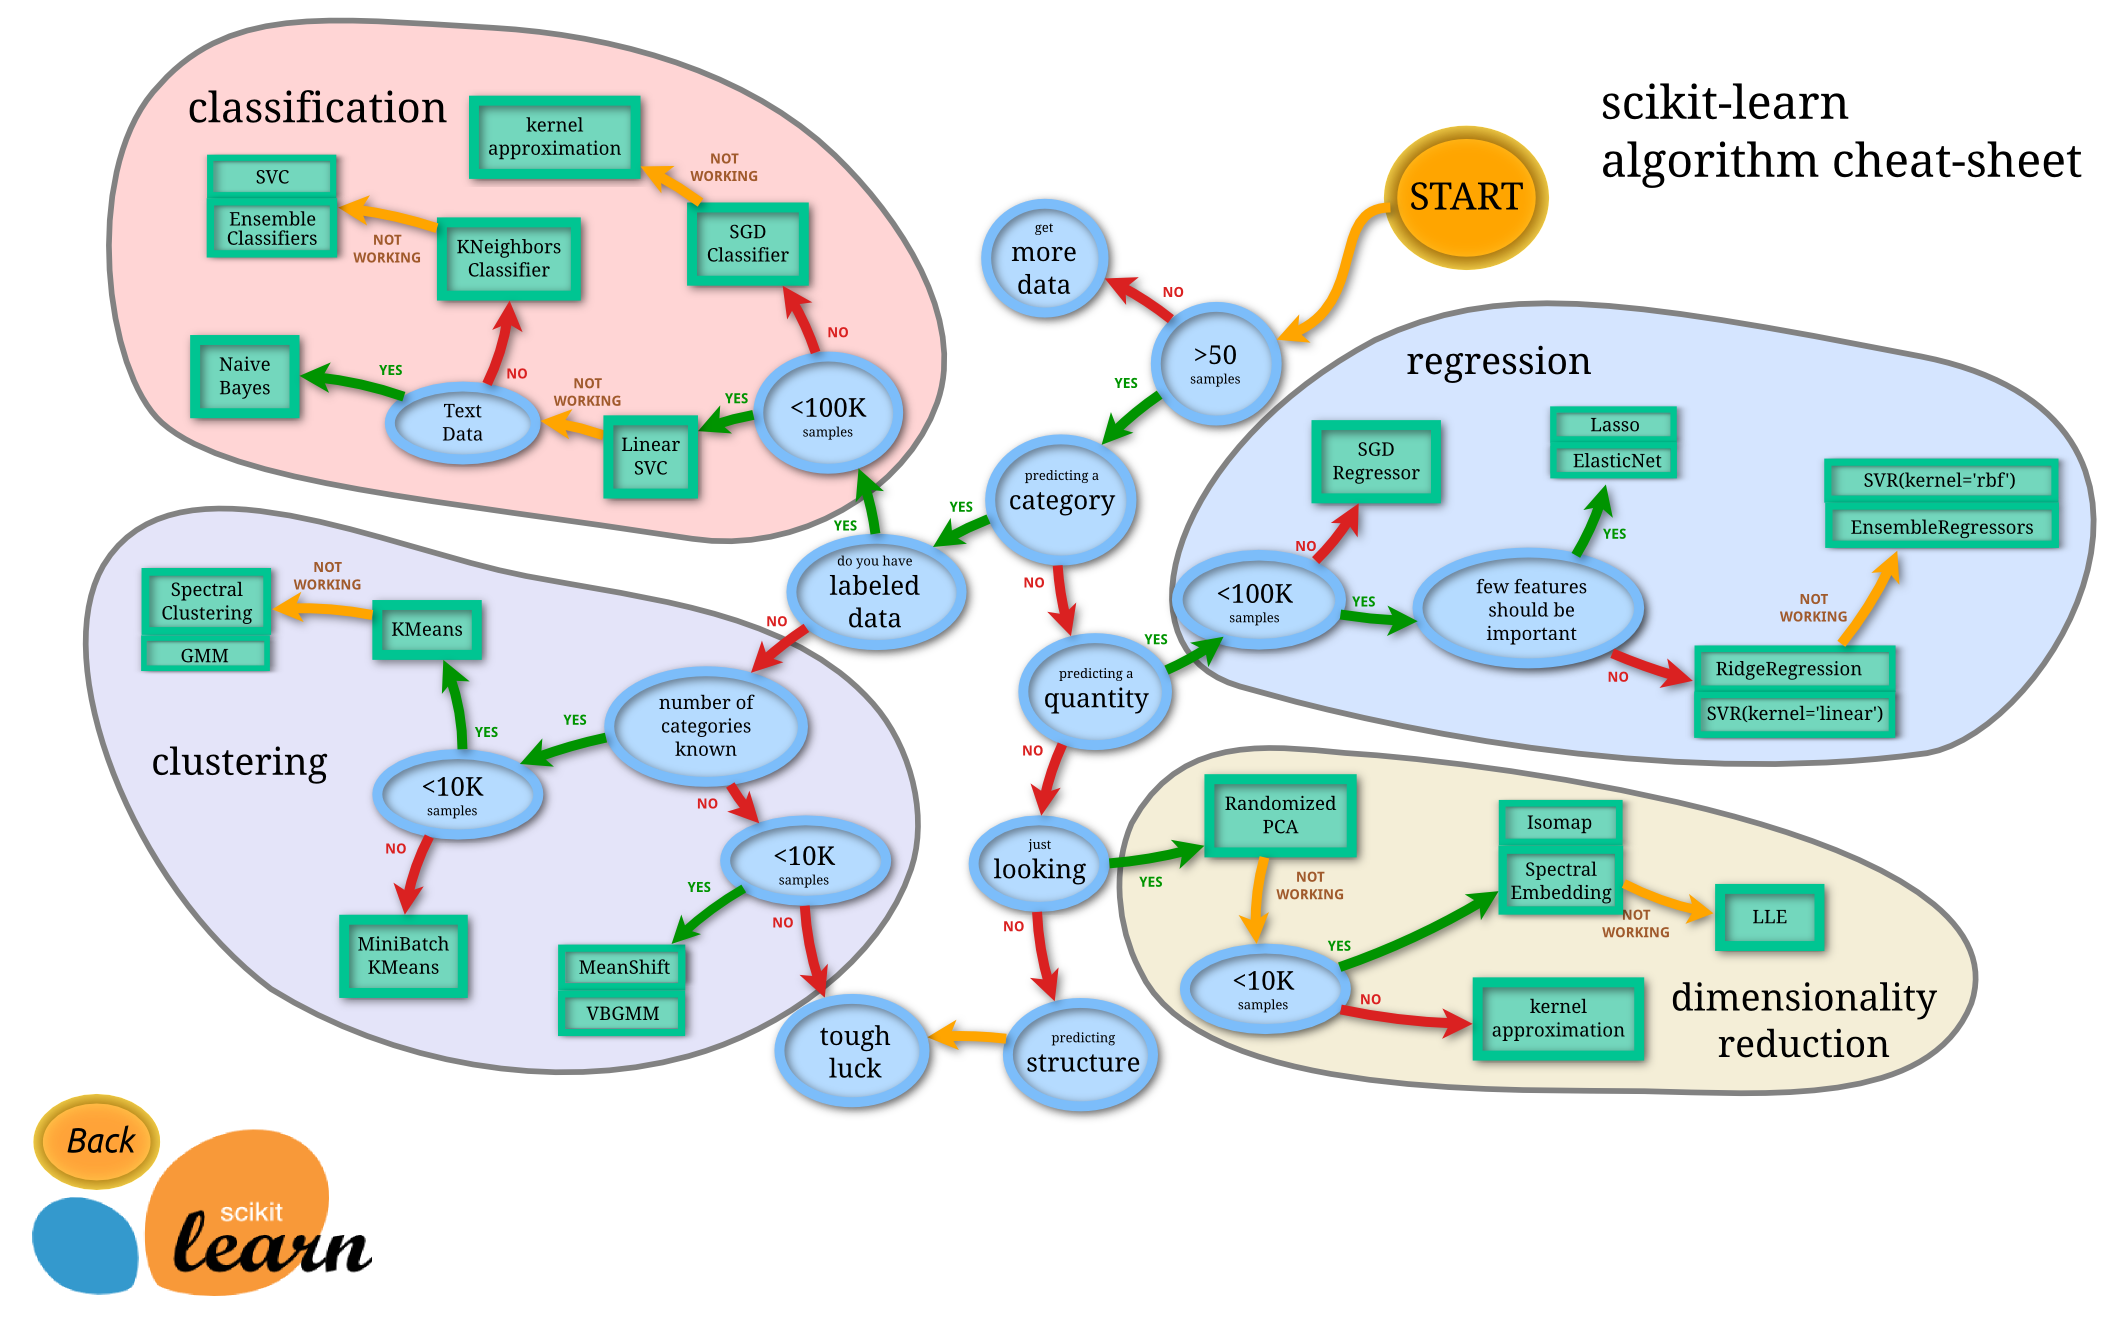